In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import math
import sklearn.metrics as skl
from statistics import mean
from astropy.stats import rayleightest
from astropy import units as u

In [30]:
#create polar histogram dataframe
dataraw=pd.read_excel('E:\\Jake\\2020-05-25_Morphologies_DendriticPolarHist.xlsx', indexCol=0, usecols='B:BI')
dataraw.head()
degrees=list(dataraw.iloc[:,1])

#Drop degrees start and end
dataraw=dataraw.drop(['Degrees Start','Degrees End'], 1)
#Rename columns to match
columnNames=list(dataraw.columns)
for j in range (1,7):
    columnNames= [i.replace('Cell'+str(j),'Cell0'+str(j)) for i in columnNames]
    columnNames= [i.replace('_',': ') for i in columnNames]
dataraw.columns=columnNames
#Sort columns into order
dataraw=dataraw.reindex(sorted(dataraw.columns),axis=1)

In [31]:
dataraw.head()

,AS016: Cell01,AS016: Cell02,AS029: Cell01,AS030: Cell01,AS035: Cell01,AS036: Cell01,AS038: Cell01,AS039: Cell01,AS039: Cell02,AS040: Cell01,...,AS114: Cell01,AS114: Cell02,AS114: Cell03,AS115: Cell01,AS116: Cell01,AS116: Cell02,AS117: Cell04,AS132: Cell03,AS143: Cell03,AS152: Cell01
0,58.7940,124.0810,40.4785,61.5245,17.14300,1.58986,45.0713,78.0655,29.3576,34.3824,...,43.4420,13.13890,91.6264,27.47570,6.09951,79.6093,11.1637,0.00000,0.0,33.5860
1,51.1905,84.8632,97.4786,90.9126,5.92745,2.61099,30.7896,40.4554,38.1241,25.1566,...,67.3570,9.93659,27.2041,18.78160,8.42899,61.2004,28.5257,0.00000,0.0,38.5144
2,62.5227,121.1750,59.8662,126.3040,17.35110,6.64361,41.3197,29.3701,26.8393,12.5108,...,72.6709,10.84600,39.9900,10.78950,6.76544,77.0998,13.9830,0.00000,0.0,22.1958
3,97.9568,151.3410,99.5298,116.4510,14.62350,19.68970,43.5966,44.0261,23.4974,10.4177,...,82.8800,14.49870,34.9198,8.63622,9.96621,101.3010,13.0202,0.00000,0.0,16.5249
4,134.8850,98.8104,48.5313,72.7581,10.00100,30.01430,40.1021,61.4438,20.8760,11.2350,...,92.7202,21.51210,52.7649,12.94130,30.03320,82.2912,49.7982,3.92467,0.0,32.5811


In [32]:
#Normalise by longest bin
longest=dataraw.max(0)
datastd=dataraw.div(longest, axis=1)
datastd

,AS016: Cell01,AS016: Cell02,AS029: Cell01,AS030: Cell01,AS035: Cell01,AS036: Cell01,AS038: Cell01,AS039: Cell01,AS039: Cell02,AS040: Cell01,...,AS114: Cell01,AS114: Cell02,AS114: Cell03,AS115: Cell01,AS116: Cell01,AS116: Cell02,AS117: Cell04,AS132: Cell03,AS143: Cell03,AS152: Cell01
0,0.222442,0.217708,0.406697,0.321146,0.388300,0.042874,0.354231,0.304031,0.468233,0.448970,...,0.257928,0.082815,0.560211,0.219419,0.060269,0.763660,0.072039,0.000000,0.000000,0.508465
1,0.193675,0.148898,0.979391,0.474546,0.134261,0.070411,0.241986,0.157556,0.608052,0.328498,...,0.399918,0.062631,0.166328,0.149989,0.083287,0.587071,0.184075,0.000000,0.000000,0.583077
2,0.236549,0.212610,0.601490,0.659282,0.393014,0.179160,0.324746,0.114384,0.428068,0.163368,...,0.431468,0.068363,0.244502,0.086164,0.066850,0.739588,0.090232,0.000000,0.000000,0.336027
3,0.370610,0.265538,1.000000,0.607852,0.331232,0.530979,0.342641,0.171463,0.374767,0.136036,...,0.492083,0.091386,0.213502,0.068968,0.098476,0.971740,0.084019,0.000000,0.000000,0.250174
4,0.510325,0.173370,0.487606,0.379783,0.226529,0.809406,0.315176,0.239297,0.332957,0.146708,...,0.550507,0.135592,0.322609,0.103349,0.296759,0.789387,0.321345,0.203613,0.000000,0.493252
5,0.619949,0.030205,0.349083,0.418748,0.461063,0.595040,0.424718,0.128398,0.243649,0.106325,...,0.506565,0.225472,0.181667,0.149398,0.162600,0.472463,0.223862,0.000000,0.519056,0.557996
6,0.391185,0.093231,0.614575,0.388027,0.374243,0.133182,0.542662,0.132771,0.427838,0.159931,...,0.545390,0.435299,0.346348,0.323117,0.308565,0.421573,0.270946,0.227001,0.386282,0.299593
7,0.498388,0.139042,0.554432,0.395515,0.257624,0.077816,0.408277,0.135946,0.571977,0.187743,...,0.591013,0.632475,1.000000,0.446414,0.422414,0.297559,0.458364,0.416163,0.356075,0.246354
8,0.518070,0.099973,0.318489,0.558869,0.202261,0.038922,0.629989,0.233062,0.599199,0.243742,...,0.738605,0.129901,0.855200,0.398838,0.421394,0.189810,1.000000,0.395034,0.285445,0.195468
9,0.225475,0.328394,0.413487,0.504847,0.269649,0.200062,0.782983,0.288625,0.605765,0.222512,...,1.000000,0.224126,0.704684,0.642321,0.262075,0.331526,0.350209,0.352472,0.797683,0.630084


In [33]:
#Mean length per bin
means = datastd.mean(0)
means.to_frame()

#Standard deviation
std= datastd.std(0)
std.to_frame()

#Variance
var=datastd.var(0)
var.to_frame()

#40 degree bin containing longest cumulative dendritic length
def maxAngle(cell):
    binTotal=[]
    cell=list(cell)
    for i in range (0,35,4):
        binTotal.append(sum(cell[i:i+3]))
    largestBin=binTotal.index(max(binTotal))
    return (largestBin+0.5)*40

maxAngles=[]
for i in range (0,len(datastd.columns)):
    maxAngles.append(maxAngle(datastd.iloc[:,i]))
maxAngles=pd.DataFrame(maxAngles, index=datastd.columns)    



#list of metrics and column names
variables=[means, std, var, maxAngles]

variableNames=['Dendrite_polar_length_mean', 
         'Dendrite_polar_length_std',
         'Dendrite_polar_length_variance',
         'Dendrite_polar_longest_bin']


#Create dataframe
perams=pd.concat(variables, axis=1)
perams.columns=variableNames
perams=perams.T
perams

,AS016: Cell01,AS016: Cell02,AS029: Cell01,AS030: Cell01,AS035: Cell01,AS036: Cell01,AS038: Cell01,AS039: Cell01,AS039: Cell02,AS040: Cell01,...,AS114: Cell01,AS114: Cell02,AS114: Cell03,AS115: Cell01,AS116: Cell01,AS116: Cell02,AS117: Cell04,AS132: Cell03,AS143: Cell03,AS152: Cell01
Dendrite_polar_length_mean,0.398822,0.371481,0.374605,0.327464,0.321695,0.34947,0.459234,0.379131,0.638801,0.390497,...,0.522948,0.324033,0.441642,0.289817,0.392776,0.558750,0.156352,0.107364,0.183399,0.448826
Dendrite_polar_length_std,0.211449,0.236290,0.300087,0.236692,0.279975,0.31029,0.181563,0.255947,0.186113,0.241370,...,0.194083,0.228327,0.253107,0.269312,0.242165,0.239326,0.182249,0.198186,0.281979,0.227200
Dendrite_polar_length_variance,0.044711,0.055833,0.090052,0.056023,0.078386,0.09628,0.032965,0.065509,0.034638,0.058259,...,0.037668,0.052133,0.064063,0.072529,0.058644,0.057277,0.033215,0.039278,0.079512,0.051620
Dendrite_polar_longest_bin,260.000000,140.000000,340.000000,100.000000,340.000000,260.00000,100.000000,340.000000,300.000000,340.000000,...,140.000000,260.000000,260.000000,260.000000,260.000000,260.000000,100.000000,180.000000,100.000000,300.000000


In [35]:
#Export data to excel
perams.to_excel('E:\\Jake\\2020-05-31_Morphologies_PolarMetrics.xlsx')

<IPython.core.display.Javascript object>


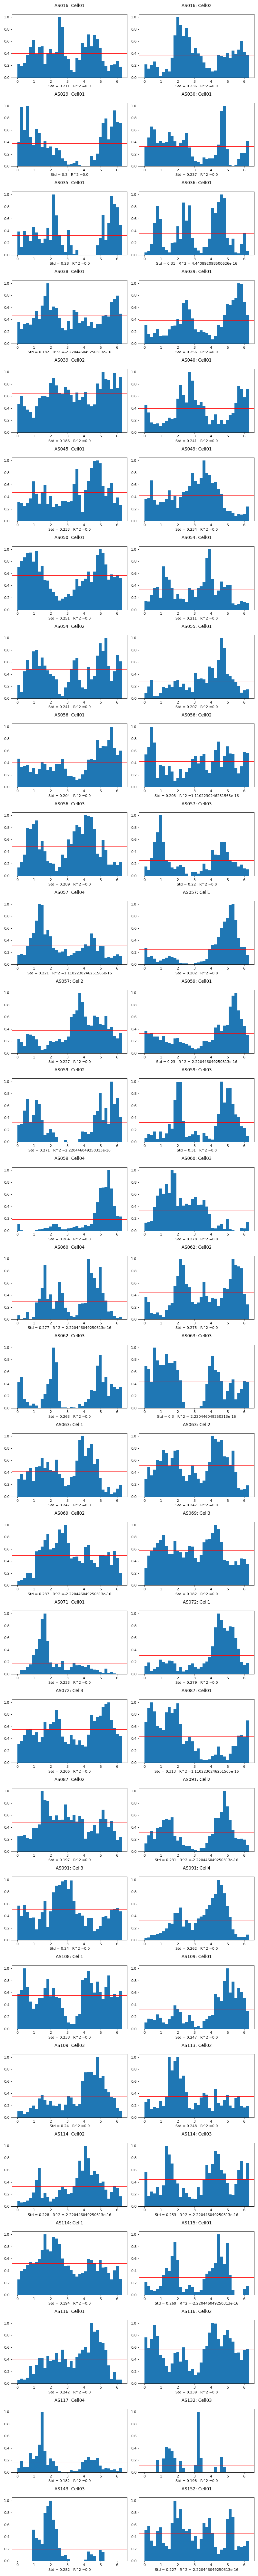

In [29]:
#plot linear histograms
def plot_hist(lengths,location,title,std,avrg):
    bins=np.radians(np.linspace(5,355,36))
    ax = plt.subplot(29,2,location, polar=False)
    ax.bar(bins,lengths, width=2*np.pi/36)
    ax.set_title(title, pad=20)
    r2=skl.r2_score(lengths, avrg)
    ax.set_xlabel('Std = ' + str(np.around(std,3))+'   R^2 ='+str(r2))
    ax.axhline(y=avg[0], color ='r', linestyle='-')
    return


fig, axes=plt.subplots(29,2, figsize=(10,100))

for i in range(0,len(dataraw.columns)):
    avg= [mean(datastd.T.values[i])]*len(datastd.T.values[i])
    plot_hist(datastd.T.values[i], i+1, datastd.columns[i], perams.iat[1,i], avg)

plt.tight_layout()
plt.show()
fig.savefig('E:\\Jake\\normalised_linear_histograms.png')

<IPython.core.display.Javascript object>


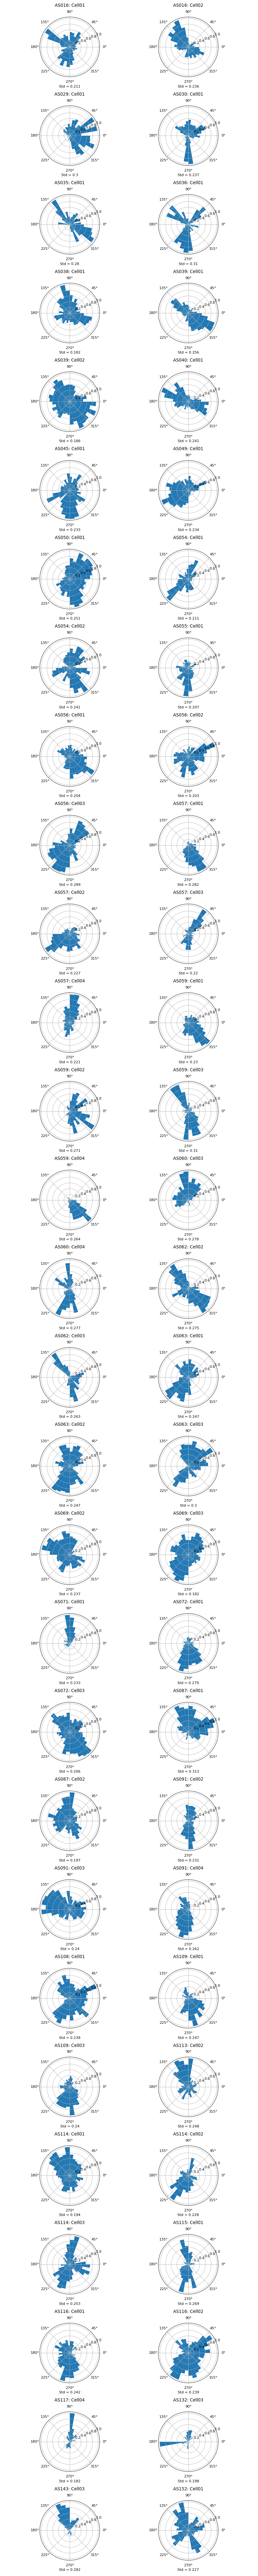

In [12]:
#plot polar histograms
def plot_hist(lengths,location,title,std, avrg):
    bins=np.radians(np.linspace(5,355,36))
    ax = plt.subplot(29,2,location, polar=True)
    ax.bar(bins,lengths, width=2*np.pi/36)
    ax.set_title(title, pad=20)
    ax.set_xlabel('Std = ' + str(np.around(std,3)))
    return


fig, axes=plt.subplots(29,2, figsize=(10,100))

for i in range(0,len(datastd.columns)):
    avg= [mean(datastd.T.values[i])]*len(datastd.T.values[i])
    plot_hist(datastd.T.values[i], i+1, datastd.columns[i], perams.iat[1,i], avg)

plt.tight_layout()
plt.show()
fig.savefig('E:\\Jake\\normalised_polar_histograms.png')

In [49]:
tests=[]
for j in range(0,len(dataraw.columns)):
    magnitudes=[]
    for i in range(0,35):
        magnitude=int(round(dataraw.iloc[i,j]))
        magnitudes=magnitudes+([i*10+5]*round(magnitude/10))
    magnitudes=np.array(magnitudes)*u.deg
    tests.append(rayleightest(magnitudes))
pd.Series(tests).to_frame
tests

[<Quantity 0.00193146>,
 <Quantity 5.34695271e-12>,
 <Quantity 9.25168532e-13>,
 <Quantity 0.0012693>,
 <Quantity 0.00914865>,
 <Quantity 0.31877793>,
 <Quantity 0.2270363>,
 <Quantity 0.00039102>,
 <Quantity 0.69793845>,
 <Quantity 0.04352857>,
 <Quantity 0.00073588>,
 <Quantity 4.418696e-07>,
 <Quantity 3.51755378e-11>,
 <Quantity 0.00031234>,
 <Quantity 0.08218634>,
 <Quantity 5.03133545e-10>,
 <Quantity 3.06214189e-06>,
 <Quantity 0.01661864>,
 <Quantity 0.02011561>,
 <Quantity 3.82123946e-33>,
 <Quantity 1.14265364e-13>,
 <Quantity 0.01888717>,
 <Quantity 2.38498197e-06>,
 <Quantity 7.07385378e-19>,
 <Quantity 6.5187071e-07>,
 <Quantity 0.19261911>,
 <Quantity 5.83033225e-22>,
 <Quantity 5.50164948e-26>,
 <Quantity 0.00417239>,
 <Quantity 0.03307001>,
 <Quantity 0.03335142>,
 <Quantity 2.58867191e-05>,
 <Quantity 0.25182156>,
 <Quantity 0.00021517>,
 <Quantity 2.90667391e-07>,
 <Quantity 0.0200059>,
 <Quantity 7.04950916e-21>,
 <Quantity 1.23407504e-21>,
 <Quantity 0.19413532>,
 <